## N차 과제 - API Scrapping_Reddit

- 주제: API를 활용한 데이터 불러오기 및 분석
- 데이터: 커뮤니티 텍스트 데이터(API 활용)
- 사용 라이브러리: praw, wordcloud, seaborn, nltk

### 1. 라이브러리 및 API 설정

1.1 미국 최대 커뮤니티 중 하나인 레딧(Reddit)에서 데이터를 불러오기 위해 praw 라이브러리를 install 해야 합니다.

1.2 라이브러리 설정

In [26]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

1.3 자연어처리를 위해 사용할 nltk 패키지를 다운로드하겠습니다(NLP 과제가 아니므로 자세히 살펴보지는 않겠습니다).

궁금하신 분들을 위해!
https://datascienceschool.net/03%20machine%20learning/03.01.01%20NLTK%20%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

1.4 API 인증을 받겠습니다. 절차의 경우 추가로 첨부한 자료를 참고해주세요.
### **과제를 제출할 때는 본 항목의 API 키들은 모두 지우고 제출해주세요! 공유되면 안 됩니다.**

### 2. 데이터 수집 및 분석

2.1 본격적으로 API를 활용해 데이터를 불러오겠습니다. 먼저 subreddit을 'stocks'로 설정하고 엔비디아 주식에 대한 게시글을 가져오겠습니다.

In [32]:
subreddit_name = 'stocks'
search_query = 'NVIDIA OR NVDA'
subreddit = reddit.subreddit(subreddit_name)
top_posts = subreddit.search(search_query, limit=300, sort='top')


2.2 가져온 데이터를 제목과 내용으로 분리된 데이터프레임으로 변환하세요.

In [34]:
data = []
# subreddit.search가 lazy Iterator를 통해 데이터를 로드하여 한 번 로드하면 데이터가 사라져서 데이터를 불러오는 동시에 별도의 자료구조에 저장하여야했다.
for submission in top_posts:
    data.append({
        'Title': submission.title,
        'Body': submission.selftext if submission.selftext else 'No Text'
    })

# 리스트를 데이터프레임으로 변환
df = pd.DataFrame(data)
print(df)

                                                 Title  \
0         A note to young investors (or new investors)   
1    To all of you who are red this year while the ...   
2    Pelosi's husband buying over $1 million of com...   
3               Beware of what AMC shorts are holding!   
4                        Blackberry -- A Dormant Giant   
..                                                 ...   
230  Here is a Market Recap for today Thursday, Nov...   
231  TSMC sales grow 45% in July on strong AI chip ...   
232  META Still The Cheapest of The Magnificent 7, ...   
233  Made 30% since I started trading 7 months ago ...   
234  CNBC: Meta’s advertising growth is proof that ...   

                                                  Body  
0    As the Fed caused a bit of a ripple in the mar...  
1    Lately I keep hearing the same old narrative f...  
2    [Full Article](https://www.msn.com/en-us/tv/ne...  
3    I understand that most people in this thread i...  
4    ###**Abbrevia

2.3 가져온 데이터를 토큰화, 불용어 제거 등 분석에 활용하기 위한 전처리를 진행하세요.

In [36]:
from nltk.stem import WordNetLemmatizer
import string
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # 1. 소문자로 변환
    text = text.lower()
    
    # 2. 구두점 등 제거
    # wordcloud에서 상위 빈도 top10을 뽑은 결과 `가 나와서 추가로 제거해줬음
    extra_punctuation = string.punctuation + '‘’“”`'
    text = text.translate(str.maketrans('', '', extra_punctuation))
    # 3. 토큰화
    tokens = word_tokenize(text)
    
    # 4. 불용어 제거
    tokens = [word for word in tokens if word not in stop_words]
    
    # 5. 어간 추출 (lemmatization)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens

# 제목과 본문에 대해 전처리 적용
df['Processed_Title'] = df['Title'].apply(preprocess_text)
df['Processed_Body'] = df['Body'].apply(preprocess_text)

print(df)

                                                 Title  \
0         A note to young investors (or new investors)   
1    To all of you who are red this year while the ...   
2    Pelosi's husband buying over $1 million of com...   
3               Beware of what AMC shorts are holding!   
4                        Blackberry -- A Dormant Giant   
..                                                 ...   
230  Here is a Market Recap for today Thursday, Nov...   
231  TSMC sales grow 45% in July on strong AI chip ...   
232  META Still The Cheapest of The Magnificent 7, ...   
233  Made 30% since I started trading 7 months ago ...   
234  CNBC: Meta’s advertising growth is proof that ...   

                                                  Body  \
0    As the Fed caused a bit of a ripple in the mar...   
1    Lately I keep hearing the same old narrative f...   
2    [Full Article](https://www.msn.com/en-us/tv/ne...   
3    I understand that most people in this thread i...   
4    ###**Abb

2.4 전처리된 데이터를 활용해 어떤 단어가 가장 많이 나왔는지 WordCloud를 통해 확인하세요.

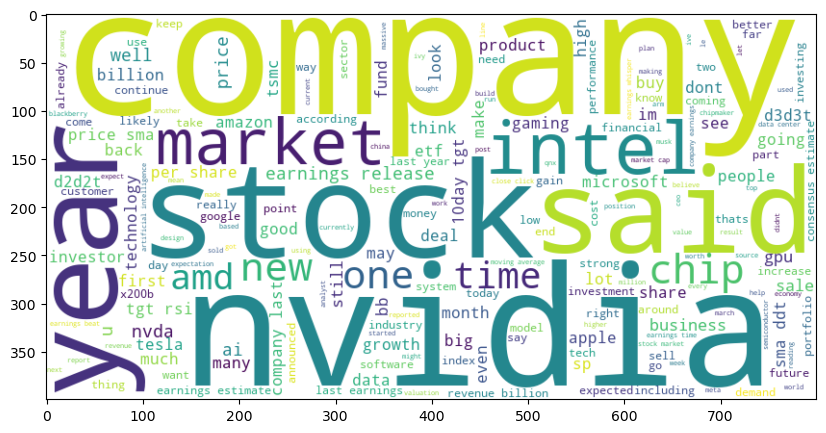

In [38]:
all_words = df['Processed_Title'].sum() + df['Processed_Body'].sum()
all_words_str = ' '.join(all_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words_str)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.show()

2.6 가장 많이 나온 단어에는 어떤 것들이 있는지 barplot을 그려 확인하세요.

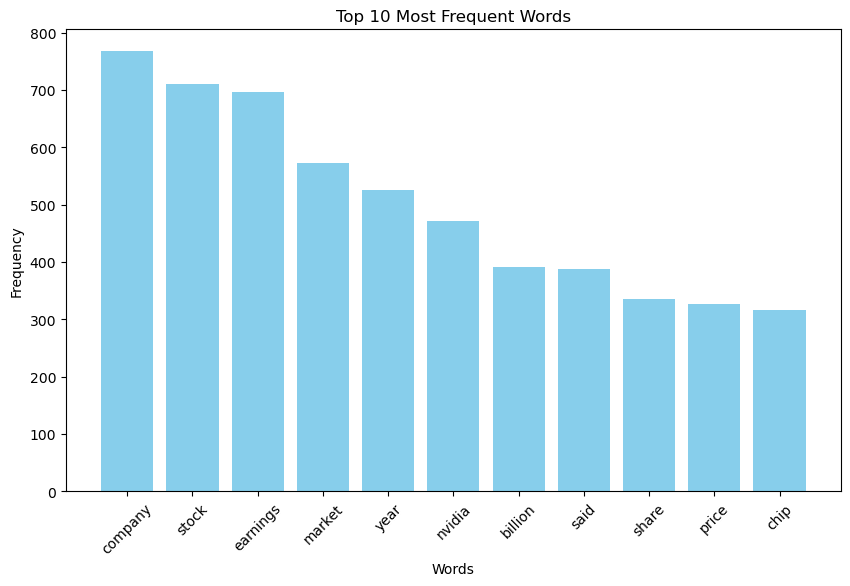

In [40]:
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(11)
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()


# **제출 시 API 인증 부분의 id, secret은 모두 지우고 제출해주세요!**

### 3. 자유 분석

위에서 진행한 분석만으로는 유의미한 인사이트를 도출하기는 어렵습니다. 추가적인 분석을 통해 해당 주식에 대한 평가가 긍정적인지, 또는 어떠한 이슈가 있는지 확인하는 것과 같은 추가적인 분석을 진행해주세요. 게시글이 아닌 리뷰를 가져오는 것도 가능합니다.

또한 본 분석에서 사용한 데이터가 아닌 다른 데이터를 활용하거나 또 다른 커뮤니티 혹은 사이트에서 API를 받아와 새로운 주제를 가지고 분석하는 것도 좋습니다:)

## 어떤 단어를 사용하면 업보트 점수를 높게 할 수 있을까라는 생각에서 착안하여,특정 단어의 빈도수와 조회수의 score간의 상관관계를 구해보고자 했습니다.

In [45]:
subreddit_name = 'stocks'
search_query = 'NVIDIA OR NVDA'
subreddit = reddit.subreddit(subreddit_name)
top_posts = subreddit.search(search_query, limit=300, sort='top')
view_data = []
for submission in top_posts:
    view_data.append({
        'Title': submission.title,
        'Body': submission.selftext,
        'Score': submission.score,  # 업보트 점수
        'Comments': submission.num_comments  # 댓글 수
    })
view_df = pd.DataFrame(view_data)
print(view_df)

                                                 Title  \
0         A note to young investors (or new investors)   
1    To all of you who are red this year while the ...   
2    Pelosi's husband buying over $1 million of com...   
3               Beware of what AMC shorts are holding!   
4                        Blackberry -- A Dormant Giant   
..                                                 ...   
230  Here is a Market Recap for today Thursday, Nov...   
231  TSMC sales grow 45% in July on strong AI chip ...   
232  META Still The Cheapest of The Magnificent 7, ...   
233  Made 30% since I started trading 7 months ago ...   
234  CNBC: Meta’s advertising growth is proof that ...   

                                                  Body  Score  Comments  
0    As the Fed caused a bit of a ripple in the mar...   6216       722  
1    Lately I keep hearing the same old narrative f...   5849      1165  
2    [Full Article](https://www.msn.com/en-us/tv/ne...   5791       457  
3    I 

In [46]:
view_df['Processed_Title'] = view_df['Title'].apply(preprocess_text)
view_df['Processed_Body'] = view_df['Body'].apply(preprocess_text)
print(view_df)

                                                 Title  \
0         A note to young investors (or new investors)   
1    To all of you who are red this year while the ...   
2    Pelosi's husband buying over $1 million of com...   
3               Beware of what AMC shorts are holding!   
4                        Blackberry -- A Dormant Giant   
..                                                 ...   
230  Here is a Market Recap for today Thursday, Nov...   
231  TSMC sales grow 45% in July on strong AI chip ...   
232  META Still The Cheapest of The Magnificent 7, ...   
233  Made 30% since I started trading 7 months ago ...   
234  CNBC: Meta’s advertising growth is proof that ...   

                                                  Body  Score  Comments  \
0    As the Fed caused a bit of a ripple in the mar...   6216       722   
1    Lately I keep hearing the same old narrative f...   5849      1165   
2    [Full Article](https://www.msn.com/en-us/tv/ne...   5791       457   
3  

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

view_df['Text'] = view_df['Title'] + " " + view_df['Body']
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(view_df['Text'])
words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
correlations = []

for word in words_df.columns:  # words_df의 각 단어
    correlation = view_df['Score'].corr(words_df[word])  # 각 단어와 Score 간의 상관관계 계산
    correlations.append((word, correlation))

correlations.sort(key=lambda x: abs(x[1]), reverse=True)
print("스코어에 영향을 많이 주는 단어:")
for word, corr in correlations[:10]:
    print(f"{word}: {corr:.2f}")

스코어에 영향을 많이 주는 단어:
pure: 0.43
regardless: 0.43
involvement: 0.40
healthcare: 0.38
99: 0.38
steroids: 0.37
tonight: 0.37
patient: 0.36
bounce: 0.36
sp: 0.35


pure, regardless, patient, bounce와 같이 양적으로 치우쳐진 자질의 단어를 사용하면 조금은 유리할 수 있음을 알 수 있습니다.
involvement, tonight과 같이 현재와 관련이 높거나 참여의 의미 자질을 가진 단어를 사용하면 조금은 유리함을 알 수 있습니다.